# Maschinelles Lernen (ML) - Übung 4
# Support Vector Machines
#### Institute Industrial IT
#### AG Diskrete Systeme
#### Anton Pfeifer, Christoph-Alexander Holst

In [2]:
import sklearn
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Hilfs-Funktionen
from utils import *

# To make this notebook's output stable across runs
np.random.seed(42)

## Das Beispiel aus dem Arbeitsblatt
In dieser Übung wird die *Support Vector Machine* (SVM) eingeführt. Das zugrunde liegende Prinzip lässt sich sehr gut anhand der folgenden Codezelle darstellen. Diese generiert zwei Cluster, die sich sehr leicht mit einer Geraden voneinander trennen lassen (*linear separierbar*).

Die Abbildung auf der linken Seite zeigt verschiedene Entscheidungsgrenzen von drei linearen Klassifikatoren. Die grün gestrichelte Linie trennt die beiden Cluster in zwei Klassen. Die rote und die blaue Linie befinden sich sehr nah an den Datenpunkten. Diese Modelle werden auf Testdaten vermutlich schlechter abschneiden.

Die Abbildung auf der rechten Seite zeigt die Entscheidungsgrenze eines SVM-Klassifikators. Hierbei trennt die Linie die beiden Klassen mit dem größtmöglichen Abstand zu den nächstgelegenen Trainingsdatenpunkten (gestrichelte Linie). Der Abstand zu den nächstgelegenen Punkten wird auch als *margin* bezeichnet. 

Die SVM gehört im maschinellen Lernen zu den beliebtesten Modellen und wird im Rahmen dieser Übung als Werkzeug eingeführt. Die SVM eignet sich sowohl als linearer Klassifikator als auch nichtlinearer Klassifikator sowie für unterschiedliche Regressionsaufgaben.

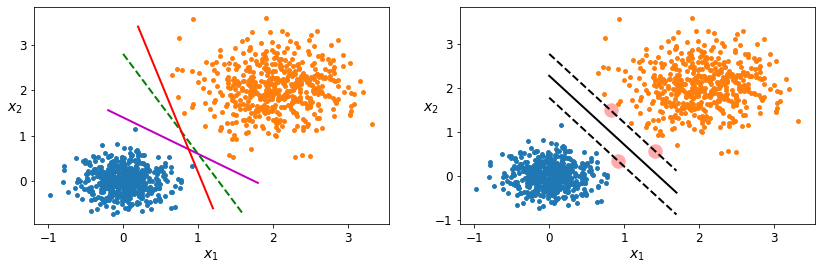

In [3]:
# Make two cluster
blob_centers = np.array(
    [[ 0.0,  0.0],
     [ 2.0 , 2.0]
    ])
blob_std = np.array([0.3, 0.5])

X, y = make_blobs(n_samples=1000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

cluster_x1 = (y == 0)
cluster_x2 = (y == 1)

X1 = X[cluster_x1]
X2 = X[cluster_x2]

# Plot two cluster
def plot_clusters(X1, X2, y=None):
    plt.scatter(X1[:, 0], X1[:, 1], s=15)
    plt.scatter(X2[:, 0], X2[:, 1], s=15)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# Bad linear models
x0 = np.linspace(0.0, 1.6, 200)
pred_1 = -2.2 * x0 + 2.8
x1 = np.linspace(-.2, 1.8, 200)
pred_2 = -.8 * x1 + 1.4
x2 = np.linspace(0.2, 1.2, 200)
pred_3 = -4 * x2 + 4.2
    
# Linear SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
    
fig, axes = plt.subplots(ncols=2, figsize=(14,4))

plt.sca(axes[0])
plot_clusters(X1, X2)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x1, pred_2, "m-", linewidth=2)
plt.plot(x2, pred_3, "r-", linewidth=2)

plt.sca(axes[1])
plot_clusters(X1, X2)
plot_svc_decision_boundary(svm_clf, 0, 1.7)
plt.show()

**Aufgabe 4.1:**
In dieser Übung experimentieren wir mit realen und künstlich generierten Datensätzen. Hierfür stehen einige frei verfügbare Datensätze aus unterschiedlichen Fachgebieten zur Verfügung. Passende Datensätze lassen sich unter den folgenden Quellen finden: 
- [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
- [Kaggle](https://www.kaggle.com/datasets)
- [Amazon AWS](http://aws.amazon.com/fr/datasets/)

Laden Sie die im Notebook bereitgestellten Datensätze und bereiten Sie jeweils einen Trainings- und einen Testdatensatz vor. Verwenden Sie hierfür die Scikit-Learn Methode `train_test_split` und wählen Sie einen geeignete Aufteilung der Datenpunkte. 

Für dieses Lab verwenden wir die folgenden Datensätze: 

- **Iris:** Bei dem Iris-Datensatz handelt es sich um einen bekannten Datensatz, der die Länge und Breite der Kelchblätter (engl. sepal) und Kronblätter (petal) von 150 Iris-Blüten enthält und sich aus drei Unterarten zusammensetzt: Iris-Setosa, Iris-Versicolor und Iris-Virginica. Der Datensatz kann über das `sklearn`-Modul geladen werden.

In [4]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
X_iris = iris_dataset["data"][:, (2, 3)]  # petal length, petal width
y_iris = iris_dataset["target"]

- **MNIST:** Der MNIST-Datensatz ist eine Sammlung von 70000 handschriftlichen Ziffern. Jedes Bild ist mit der dargestellten Ziffer gelabelt.

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X_mnist = mnist["data"]
y_mnist = mnist["target"].astype(np.uint8)

- **Künstlich generierten Datensätze:** Die Datensätze werden mit Hilfe der Methoden `make_blobs` und `make_moon` generiert. 

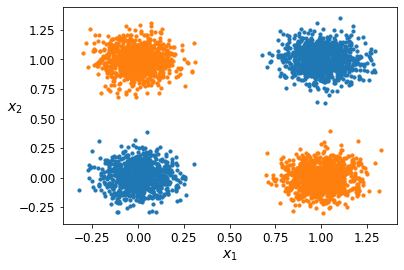

In [6]:
from sklearn.datasets import make_blobs

# XOR Blobs
blob_centers = np.array(
    [[ 0.0,  0.0],
     [ 1.0 , 0.0],
     [ 0.0,  1.0],
     [ 1.0,  1.0]
    ])
blob_std = np.array([0.1, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=4000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)


cluster_x0 = (y == 0)
cluster_x1 = (y == 1)
cluster_x2 = (y == 2)
cluster_x3 = (y == 3)

X1 = X[cluster_x0 | cluster_x3]
X2 = X[cluster_x1 | cluster_x2]

# Plot two cluster
def plot_clusters(X1, X2, y=None):
    plt.scatter(X1[:, 0], X1[:, 1], s=10)
    plt.scatter(X2[:, 0], X2[:, 1], s=10)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plot_clusters(X1, X2)
plt.show()

y[(y == 0)] = 0
y[(y == 3)] = 0
y[(y == 1)] = 1
y[(y == 2)] = 1

X_xor, y_xor = X, y

**Aufgabe 4.4:** In dieser Übung wird eine einfache lineare SVM trainiert und als linearer Klassifikator eingesetzt. Laden Sie hierfür einen geeigneten Datensatz und beantworten Sie anschließend mit Hilfe des Notebooks die folgenden Fragen. 

Für die SVM wird die von scikit-learn bereitgestellte Klasse SVC verwendet.

- **Aufgabe 4.4.1:** Setzen Sie die Klasse SVC auf verschiedene zweidimensionale, linear separierbare Datensätze Ihrer Wahl ein.

Schauen Sie in das Beispiel am Anfang des Notebooks, wie die Klasse SVC einzusetzen ist, oder schauen Sie in die offizielle Dokumentation der Klasse.

- **Aufgabe 4.4.2:** Wie wirkt sich das Hinzufügen neuer Trainingsdaten abseits der Margin auf die Entscheidungsgrenze aus?

In [ ]:
# Code

- **Aufgabe 4.4.3:** In der scikit-learn SVM-Klasse können Sie das Verhalten über einen Hyperparameter $C$ steuern, der eine $l2$-Regularisierung hinzufügt.
Trainieren Sie den Datensatz Blob mit den Trainingsdaten, variieren Sie die $l2$-Regularisierung ($C$) und evaluieren Sie den Klassifikator anschließend. 
Verwenden Sie zur Bewertung in Übung $2$ besprochene Metriken. 

In [ ]:
# Code

**Aufgabe 4.5:** Neben dem linearen SVM-Klassifikator, kann eine SVM auch auf nicht-linear separierbaren Datensätzen angewendet werden. 
Dafür werden die vorhandenen Merkmale bzw. Daten in einen höherdimensionalen Merkmalsraum transformiert. Dies geschieht z.B. durch eine polynomielle Transformation.

- **Aufgabe 4.5.1:** Wählen Sie einen zweidimensionalen Datensatz, der nur nichtlinear separierbar ist (wie z.B. das XOR-Problem). Schreiben Sie eine Funktion für eine polynomielle Transformation 2. Ordnung.	Transformieren Sie Ihre Daten mit dieser Funktion und trainieren Sie anschließend einen linearen SVM-Klassifikator (kernel=linear) auf den transformierten Daten. 
Die folgende Gleichung zeigt die umzusetzende polynomielle Zuordnungsfunktion:
\begin{equation*}    
    \phi(\mathbf{x}) = 
    \phi
	\left(
		\begin{pmatrix}
			x_1 \\
			x_2 
		\end{pmatrix} 
	\right)
	 =
     \begin{pmatrix}
		 x_1^2 \\
		 \sqrt{2} \cdot x_1 x_2 \\
		 x_2^2
	 \end{pmatrix} 
\end{equation*}

In [ ]:
# Code

- **Aufgabe 4.5.2:** Die Klasse SVC bietet natürlich die Transformationen intern an. Dazu muss der Klasse der entsprechende Kernel (z.B. kernel=poly) auf das Moons Problem an und vergleichen Sie die Ergebnisse hinsichtlich der verwendeten Kernel (Polynomieller Kernel, Gaußsche RBF-Kernel). Versuchen Sie das Ergebnis durch Verändern von Hyperparametern zu optimieren. 

In [ ]:
# Code

- **Aufgabe 4.5.3:** Trainieren Sie einen SVM-Klassifikator auf dem MNIST-Datensatz. 
Der MNIST-Datensatz beinhaltet multiple Klassen (verschiedene Ziffern). Prinzipiell eignet sich eine SVM nur als binärer Klassifikator. Um nun einen Mehrklassenklassifikator (multiclass) zu realisieren, gibt es verschiedene Strategien. 
Zwei populäre Verfahren sind die *one-vs-all* und die *one-vs-one* Strategie, in der mehrere SVMs gleichzeitig trainiert werden. 

- Recherchieren Sie die Vorgehensweisen dieser beiden Strategien. Wie funktionieren diese? Gibt es Vor- und Nachteile?
- Implementieren Sie eine SVM mit der *one-vs-all* Strategie auf dem MNIST-Datensatz. 
Was für eine Genauigkeit erreichen Sie?

In [ ]:
# Code